In [1]:
# import required libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import random
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot
  
# suppress warnings
warnings.filterwarnings('ignore')

In [2]:
def sigmoid(x):
    
    sig = 1 / (1 + np.exp(-x))
            
    return sig

In [3]:
def Loss_function(y_true, y_predicted):
     
    # Calculating the loss or cost
    
    cost = -1 * (y_true.dot(np.log(y_predicted.T)) - (1 - y_true).dot(np.log(1 - y_predicted).T)) / m

    return cost
 

In [4]:
def gradient_descent(stopping_threshold, X, y, learning_rate = 0.001):

 
    W = np.random.rand(72,1)

    b = np.random.rand()
    
    previous_cost = None
  
    for i in range(10) :

            Z = np.dot(W.T, X) + b

            A = sigmoid(Z)

            dZ = A - y

            dw = (1/m)*(np.dot(X,dZ.T))

            db = (1/m)*(np.sum(dZ))

            W = W - learning_rate * dw

            b = b - learning_rate * db
            

    
    return W,b,Z

In [ ]:
def preprocess():
    #read dataset
    datasetread = pd.read_csv("Ozone Level Detection.data",header=None)
    #remove date part of dataset
    data = datasetread.T[1:].to_numpy()
    #replacing ? values with NaN
    data[data == '?'] = np.NaN
    #filling missing values with mean strategy
    imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
    final =imputer.fit_transform(data)
    return final

In [6]:
def errrcount(X,W,b,y):
    Z = np.dot(W.T, X) + b
    A = sigmoid(Z)
    dZ = A - y
    E = np.sum(dZ)
    return E

In [7]:
def overcheck(X_train, y_train,X_test,y_test):
    train_scores, test_scores = list(), list()
    # define the tree depths to evaluate
    values = [i for i in range(1, 51)]
    # evaluate a decision tree for each depth
    for i in values:
        # configure the model
        model = KNeighborsClassifier(n_neighbors=i)
        # fit model on the training dataset
        model.fit(X_train.T, y_train)
        # evaluate on the train dataset
        train_yhat = model.predict(X_train.T)
        train_acc = accuracy_score(y_train, train_yhat)
        train_scores.append(train_acc)
        # evaluate on the test dataset
        test_yhat = model.predict(X_test.T)
        test_acc = accuracy_score(y_test, test_yhat)
        test_scores.append(test_acc)
    # plot of train and test scores vs number of neighbors
    pyplot.plot(values, train_scores, '-o', label='Train')
    pyplot.plot(values, test_scores, '-o', label='Test')
    pyplot.legend()
    pyplot.show()

In [8]:
def KFold_cross_validation(x,y):

        
        err_train=0
        err_test=0
        k = 3
        kf = KFold(n_splits=k)
        kf.get_n_splits(x)
        KFold(n_splits=3,random_state=None,shuffle=False)

        model = LogisticRegression(solver ='liblinear')
        
        acc_score = []
        
        pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=4))

        for train_index , test_index in kf.split(x.T):

            X_train , X_test = X[:,train_index] , X[:,test_index]

            y_train , y_test = y[0,train_index] , y[0,test_index]
            
            
            model.fit(X_train.T,y_train)
            pred_values = model.predict(X_test.T)
            acc = accuracy_score(pred_values,y_test)
            acc_score.append(acc)
            
            scores = cross_val_score(pipeline, X=X_train.T, y=y_train, cv=10, n_jobs=1)
            print('Cross Validation accuracy: %.3f +/- %.3f' % (np.mean(scores),np.std(scores)))
            

             # Estimating weight and bias using gradient descent
            estimated_weight, eatimated_bias,Z = gradient_descent(0.00001,X_train,y_train,0.001)
            err_train =err_train + errrcount(X_train,estimated_weight, eatimated_bias,y_train)
            err_test =err_test + errrcount(X_test,estimated_weight, eatimated_bias,y_test)
            overcheck(X_train,y_train,X_test,y_test)
            
        err_train=err_train/3
        err_test=err_test/3
            
        avg_acc_score = sum(acc_score)/k

        print('accuracy of each fold - {}'.format(acc_score))

        print('Avg accuracy : {}'.format(avg_acc_score))

        if abs(err_test-err_train)>100:
            print("Model is Overfit")
        elif abs(err_test-err_train)<2 and err_train>50:
            print("Model is Underfit")
        else:
            print("Model is Normal")
        
        

Cross Validation accuracy: 0.975 +/- 0.002


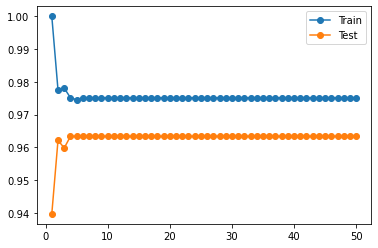

Cross Validation accuracy: 0.975 +/- 0.002


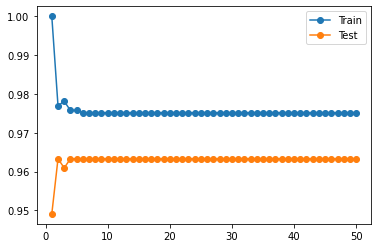

Cross Validation accuracy: 0.963 +/- 0.002


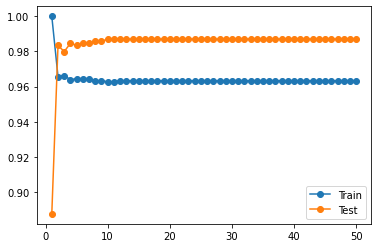

accuracy of each fold - [0.950354609929078, 0.9491124260355029, 0.978698224852071]
Avg accuracy : 0.9593884202722173
Model is Normal


In [9]:
dataset = preprocess()

X = dataset[:72]

y = dataset[72:]

m = X.shape[1]
    
KFold_cross_validation(X,y)